In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

pd.set_option("display.max_columns", None)

In [58]:
folder_path = '/Users/baxtiyorbekmurodov/Desktop/math2LLM/data/json/sales_data.json'

In [60]:
with open(folder_path, "r") as f:
    data = json.load(f)

In [69]:
X = np.array(data.get("data"))
X_scaled = np.array(data.get("data_scaled"))
y = np.array(data.get("target"))

# Sigmoid Activation Function
$\sigma=\frac{1}{1+e^{-z}}$

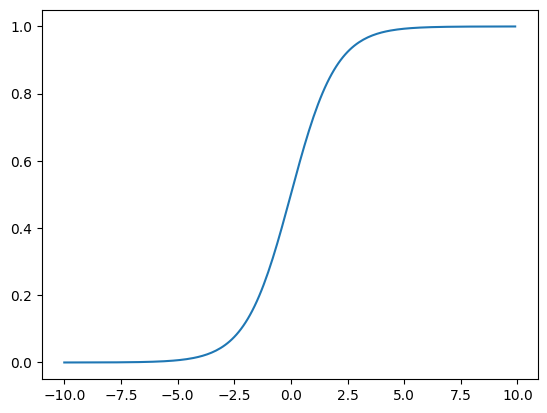

In [75]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

xs = np.arange(-10,10, 0.1)
ys = sigmoid(xs)

plt.plot(xs, ys)

## Negative Log Likelyhood

$NLL=-(y*log(\hat{y}) + (1-y) * log(1-\hat{y}))$

- $\hat{y}=\sigma=\frac{1}{1+e^{-z}}$
- $\sigma({z})=xw+b$

In [98]:
X = torch.tensor(data["data_scaled"]).float()
y = torch.tensor(y).float().view(-1, 1)

n = int(len(X) *.8)

X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]

class NNClassification(nn.Module):
    def __init__(self, in_f, out_f=1):
        super().__init__()
        self.fc1 = nn.Linear(in_f, 25)
        self.fc2 = nn.Linear(25, out_f)
    
    def forward(self, X):
        x = self.fc1(X)
        x = self.fc2(x)
        return x


n_features = X.shape[1]

model = NNClassification(n_features)
critation = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

epochs = 500

for k in range(epochs):
    y_pred = model.forward(X_train)
    loss = critation(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (k+1) % 50 == 0:
        print(f'Iter: {k} loss={loss.item()}')


y_test

Iter: 49 loss=0.16444267332553864
Iter: 99 loss=0.16306906938552856
Iter: 149 loss=0.16306596994400024
Iter: 199 loss=0.16306589543819427
Iter: 249 loss=0.16306589543819427
Iter: 299 loss=0.16306589543819427
Iter: 349 loss=0.16306589543819427
Iter: 399 loss=0.16306589543819427
Iter: 449 loss=0.16306589543819427
Iter: 499 loss=0.16306589543819427


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

X = np.array(data["data_scaled"])
y = np.array(data["target"])

n = int(len(X) *.8)

X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]


lg = LogisticRegression(max_iter=epochs, random_state=0)
lg.fit(X_train, y_train)
y_train_proba = lg.predict_proba(X_train)[:, 1]
y_test_proba  = lg.predict_proba(X_test)[:, 1]

print(f"Train Loss: {log_loss(y_train, y_train_proba)}")
print(f'Test Loss: {log_loss(y_test, y_test_proba)}')

Train Loss: 0.1632744117227968


ValueError: y_true contains only one label (1). Please provide the list of all expected class labels explicitly through the labels argument.

4
my calculation: 85
[72, 6, 6, 1]
85


In [143]:
torch.randn(3,4)

tensor([[ 1.0017,  0.7098,  0.8551,  0.3947],
        [-1.1187, -0.1366, -0.2253,  1.9062],
        [ 1.2502, -1.0120, -0.0610,  0.2534]])

In [125]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params}")

Total Trainable Parameters: 401


[72, 18, 3]